# FEATURE ENGINEERING 1

In [1]:
'''
Aerofit Example ->

Education | Gender | Income | Fitness | Usage | Product

"Product" -> Target
All other columns are features / attributes.

--------------------------------------------------

Fitness Example ->

Height | Weight | Fit?

"Fit?" -> Target
Height and Weight are both features.

We will not be able to make accurate prediction about "Fit?" using
Height / Weight individually.

We will derive a new feature called BMI.

BMI = weight (kg) / height ** 2 (m)
'''

'\nAerofit Example ->\n\nEducation | Gender | Income | Fitness | Usage | Product\n\n"Product" -> Target\nAll other columns are features / attributes.\n\n--------------------------------------------------\n\nFitness Example ->\n\nHeight | Weight | Fit?\n\n"Fit?" -> Target\nHeight and Weight are both features.\n\nWe will not be able to make accurate prediction about "Fit?" using\nHeight / Weight individually.\n\nWe will derive a new feature called BMI.\n\nBMI = weight (kg) / height ** 2 (m)\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv("loan.csv")

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
'''
"Loan_Status" -> Target
Remaining Columns -> Features
'''

'\n"Loan_Status" -> Target\nRemaining Columns -> Features\n'

In [6]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
data["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [8]:
data = data.drop("Loan_ID", axis = 1)

In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
'''
- There is a lot of variation in ApplicantIncome -> ($150, $81000)
- Most of the applicants (75%) have an income less than $6000
- A significant amount of coapplicants do not have an income.
- With the max value as $81000 and average around $5500, data seems skewed.
'''

'\n- There is a lot of variation in ApplicantIncome -> ($150, $81000)\n- Most of the applicants (75%) have an income less than $6000\n- A significant amount of coapplicants do not have an income.\n- With the max value as $81000 and average around $5500, data seems skewed.\n'

In [11]:
data.describe(include = ["object"])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [12]:
'''
- Most of the applicants are Male. (489 / 601)
- Significant amount of applicants are married. (398 / 611)
.
.
.
'''

'\n- Most of the applicants are Male. (489 / 601)\n- Significant amount of applicants are married. (398 / 611)\n.\n.\n.\n'

In [13]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
cat_cols = data.dtypes == "object"

In [15]:
cat_cols

Gender                True
Married               True
Dependents            True
Education             True
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area         True
Loan_Status           True
dtype: bool

In [16]:
cat_cols = list(cat_cols[cat_cols].index)

In [17]:
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [18]:
cat_cols.remove("Loan_Status")

In [19]:
num_cols = data.dtypes != "object"
num_cols = list(num_cols[num_cols].index)

In [20]:
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

# Skewness

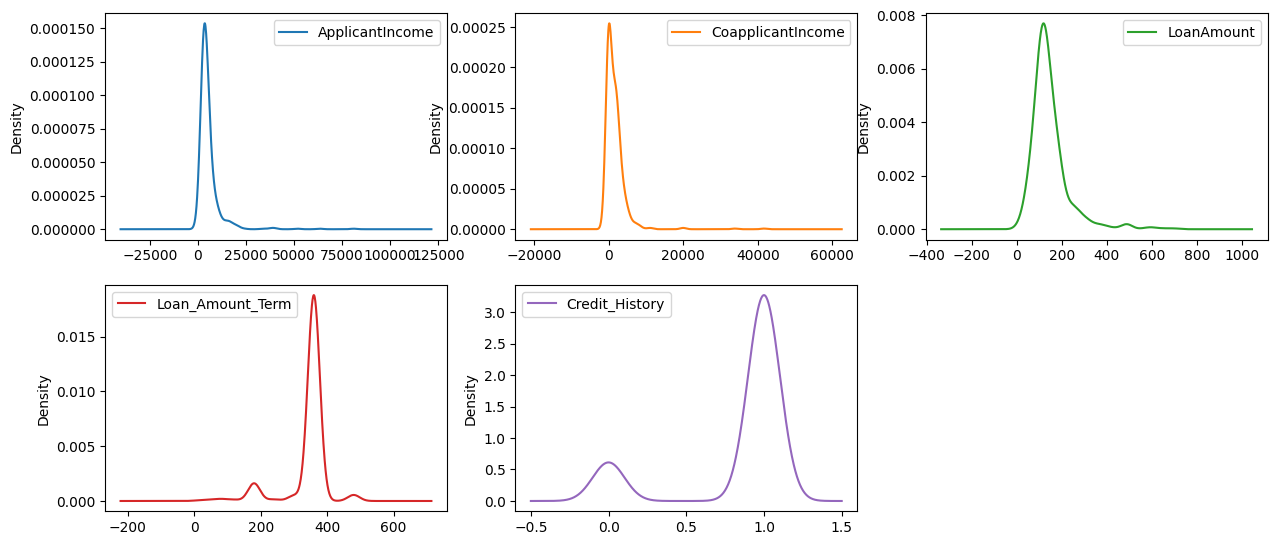

In [21]:
plt.rcParams["figure.figsize"] = [15, 10]
data.plot(kind = "density", subplots = True, layout = (3, 3), sharex = False)
plt.show()

In [22]:
print(data.skew(numeric_only = True))

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64


# Kurtosis

In [23]:
'''
Positive Kurtosis (Leptokurtic)
Normal Distribution (Mesokurtic)
Negative Kurtosis (Platykurtic)
'''

'\nPositive Kurtosis (Leptokurtic)\nNormal Distribution (Mesokurtic)\nNegative Kurtosis (Platykurtic)\n'

In [24]:
data.kurt(numeric_only = True)

ApplicantIncome      60.540676
CoapplicantIncome    84.956384
LoanAmount           10.401533
Loan_Amount_Term      6.673474
Credit_History        1.548763
dtype: float64

# Univariate Analysis

In [25]:
data["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

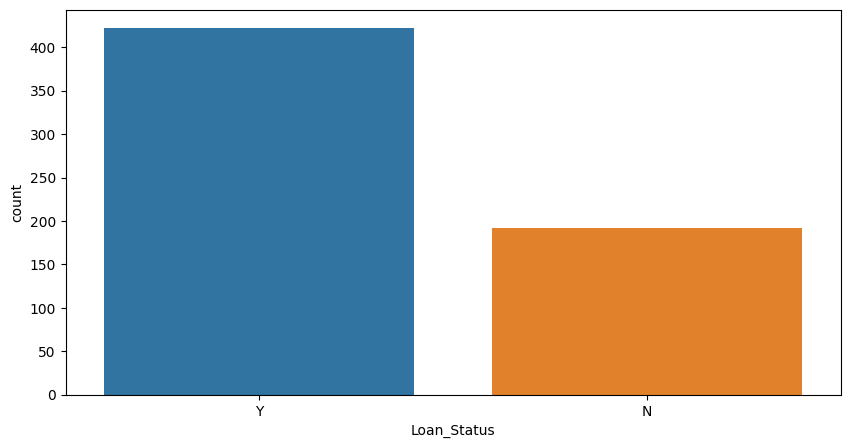

In [26]:
plt.rcParams["figure.figsize"] = [10,5]
sns.countplot(data = data, x = "Loan_Status")
plt.show()

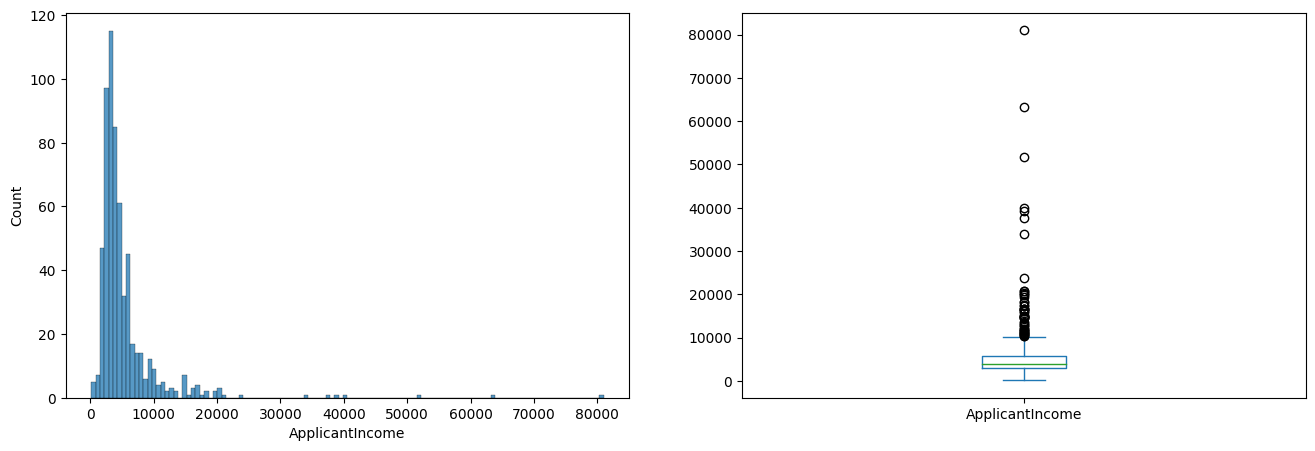

In [27]:
plt.subplot(121)
sns.histplot(data["ApplicantIncome"])

plt.subplot(122)
data["ApplicantIncome"].plot.box(figsize = (16, 5))

plt.show()

In [28]:
data.groupby("Loan_Status")["ApplicantIncome"].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [29]:
from scipy.stats import ttest_ind

a = data[data["Loan_Status"] == "Y"]["ApplicantIncome"]
b = data[data["Loan_Status"] == "N"]["ApplicantIncome"]

In [30]:
# H0: Loan Status is independent of Income
# Ha: Loan Status is dependent on Income

In [31]:
ttest_ind(a, b)

Ttest_indResult(statistic=-0.11650844828724542, pvalue=0.907287812130518)

In [32]:
'''
Extremely high P - Value -> Accept the Null Hypothesis.
Income does not play any role in determining the Loan Status.
'''

'\nExtremely high P - Value -> Accept the Null Hypothesis.\nIncome does not play any role in determining the Loan Status.\n'

# BINNING

In [33]:
# Conversion of continuous data into categorical data

In [34]:
bins = [0, 2500, 4000, 6000, 8000, 10000, 20000, 40000, 80000]
group_labels = ["Low", "Average", "Medium", "H1", "H2", "H3", "H4", "Very High"]

In [35]:
data["Income_Bin"] = pd.cut(data["ApplicantIncome"], bins, labels = group_labels)

In [36]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,Medium
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Medium
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Medium


In [37]:
pd.crosstab(data["Income_Bin"], data["Loan_Status"])

Loan_Status,N,Y
Income_Bin,,
Low,34,74
Average,67,159
Medium,45,98
H1,20,34
H2,9,22
H3,13,27
H4,3,6
Very High,0,2


In [38]:
from scipy.stats import chi2_contingency

In [39]:
val = pd.crosstab(data["Income_Bin"], data["Loan_Status"]).values

In [40]:
val

array([[ 34,  74],
       [ 67, 159],
       [ 45,  98],
       [ 20,  34],
       [  9,  22],
       [ 13,  27],
       [  3,   6],
       [  0,   2]])

In [41]:
# H0: Loan Status is independent of Income Bin
# Ha: Loan Status is dependent on Income Bin

In [42]:
chi2_contingency(val) # chi_stat, p_val, df, expected_values

(2.146634123226672,
 0.9512804301836162,
 7,
 array([[ 33.65089723,  74.34910277],
        [ 70.41761827, 155.58238173],
        [ 44.55628059,  98.44371941],
        [ 16.82544861,  37.17455139],
        [  9.65905383,  21.34094617],
        [ 12.46329527,  27.53670473],
        [  2.80424144,   6.19575856],
        [  0.62316476,   1.37683524]]))

In [43]:
'''
HOMEWORK - 

Try and do a similar analysis on TotalIncome. (ApplicantIncome + CoapplicantIncome)
'''

'\nHOMEWORK - \n\nTry and do a similar analysis on TotalIncome. (ApplicantIncome + CoapplicantIncome)\n'

In [45]:
'''
You have a DataFrame named df with a column called 'age',
and you want to create bins for age groups such as
i) 'Young', - 0 to 30
ii) 'Middle-aged',- 30 to 60 and
iii) 'Senior'. - 60 to 100

Choose the correct option.

a)
bins = [0, 30, 60, 100]
labels = ['Young', 'Middle-aged', 'Senior']
df['Age_Group'] = pd.cut(df['age'], bins=bins, labels=labels)

b)
bins = [30, 60, 100]
labels = ['Young', 'Middle-aged', 'Senior']
df['Age_Group'] = pd.cut(df['age'], bins, labels)

c)
age_bins = [0, 30, 60]
labels = ['Young', 'Middle-aged', 'Senior']
df['Age_Group'] = pd.cut(df['age'], bins=age_bins, labels=labels)

d)
age_bins = [0, 30, 60, 100]
age_labels = ['Young', 'Middle-aged', 'Senior']
df['Age_Group'] = pd.cut(age, bins=age_bins, labels=age_labels)
'''

"\nYou have a DataFrame named df with a column called 'age',\nand you want to create bins for age groups such as\ni) 'Young', - 0 to 30\nii) 'Middle-aged',- 30 to 60 and\niii) 'Senior'. - 60 to 100\n\nChoose the correct option.\n\na)\nbins = [0, 30, 60, 100]\nlabels = ['Young', 'Middle-aged', 'Senior']\ndf['Age_Group'] = pd.cut(df['age'], bins=bins, labels=labels)\n\nb)\nbins = [30, 60, 100]\nlabels = ['Young', 'Middle-aged', 'Senior']\ndf['Age_Group'] = pd.cut(df['age'], bins, labels)\n\nc)\nage_bins = [0, 30, 60]\nlabels = ['Young', 'Middle-aged', 'Senior']\ndf['Age_Group'] = pd.cut(df['age'], bins=age_bins, labels=labels)\n\nd)\nage_bins = [0, 30, 60, 100]\nage_labels = ['Young', 'Middle-aged', 'Senior']\ndf['Age_Group'] = pd.cut(age, bins=age_bins, labels=age_labels)\n"

In [47]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,Medium
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Medium
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Medium


In [48]:
data["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [49]:
data["Loan_Amount_Term"] = (data["Loan_Amount_Term"] / 12).astype("float")

In [50]:
data["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
30.0    512
15.0     44
40.0     15
25.0     13
20.0      4
7.0       4
10.0      3
5.0       2
3.0       2
1.0       1
Name: count, dtype: int64

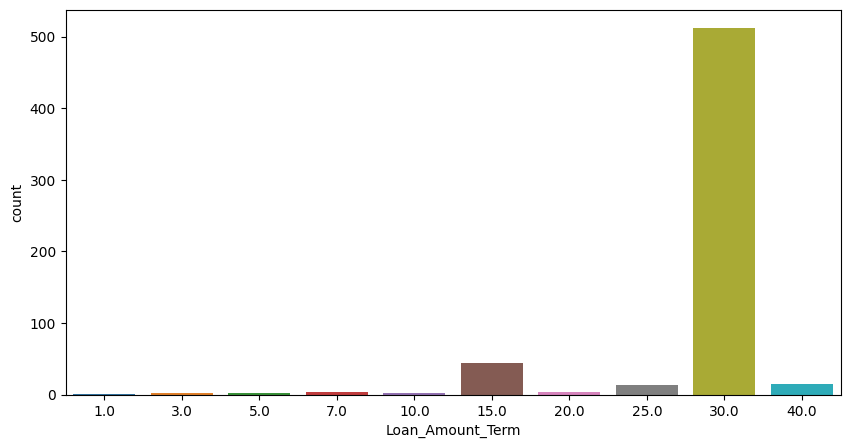

In [53]:
sns.countplot(x = "Loan_Amount_Term", data = data)
plt.show()

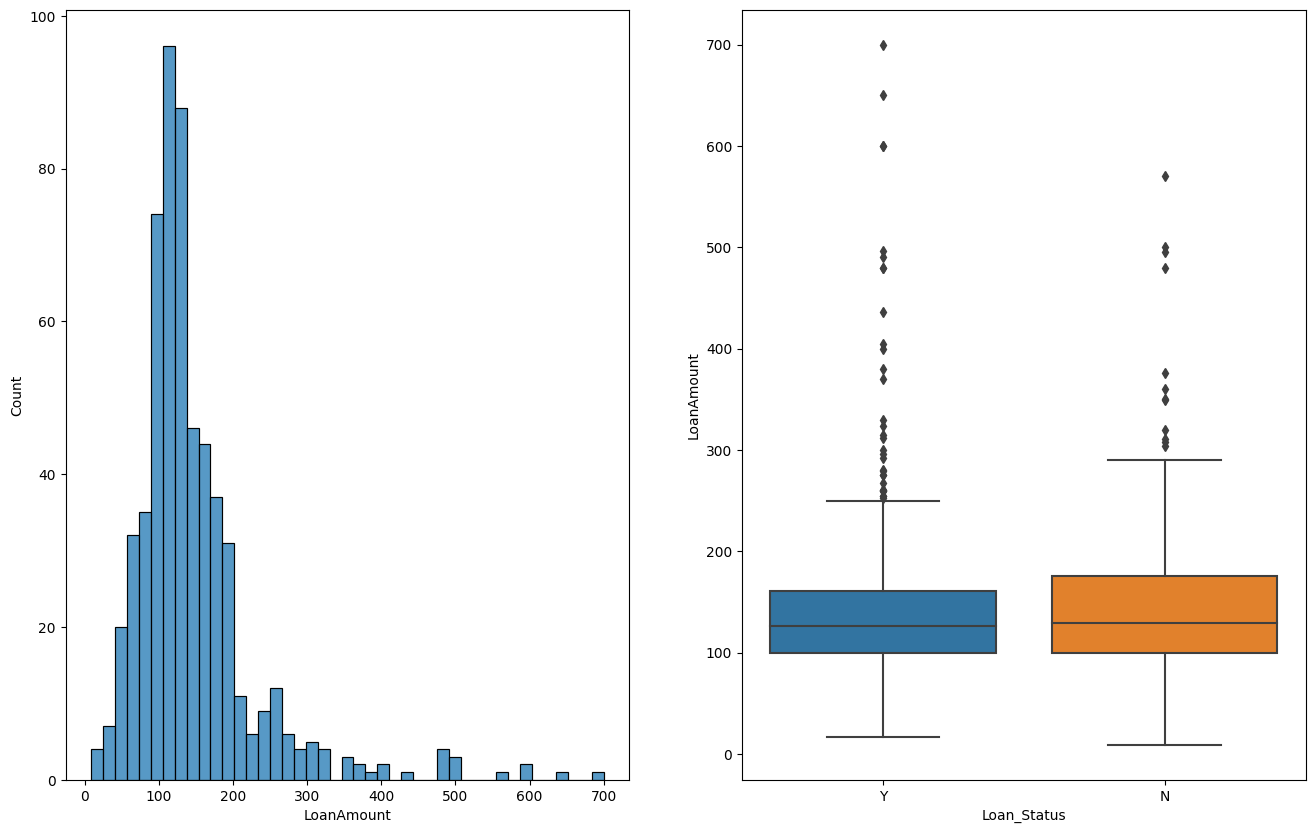

In [55]:
plt.figure(figsize = (16, 10))

plt.subplot(121)
sns.histplot(data["LoanAmount"])

plt.subplot(122)
sns.boxplot(data = data, x = "Loan_Status", y = "LoanAmount")

plt.show()

In [56]:
# Let's create a feature called "Able_To_Pay_EMI"

In [57]:
data["Loan_Amount_Per_Year"] = data["LoanAmount"] / data["Loan_Amount_Term"]
# Approximation without factoring in the interest

In [58]:
data["EMI"] = data["Loan_Amount_Per_Year"] * 1000 / 12

In [59]:
data["Total_Income"] = data["ApplicantIncome"] + data["CoapplicantIncome"]

In [63]:
data["Able_To_Pay_EMI"] = ((data["Total_Income"]) * 0.3 > data["EMI"]).astype("int")

In [64]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Bin,Loan_Amount_Per_Year,EMI,Total_Income,Able_To_Pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,Medium,NaN,NaN,5849.0,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,Medium,4.266667,355.555556,6091.0,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,2.200000,183.333333,3000.0,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4.000000,333.333333,4941.0,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,Medium,4.700000,391.666667,6000.0,1


<AxesSubplot:xlabel='Able_To_Pay_EMI', ylabel='count'>

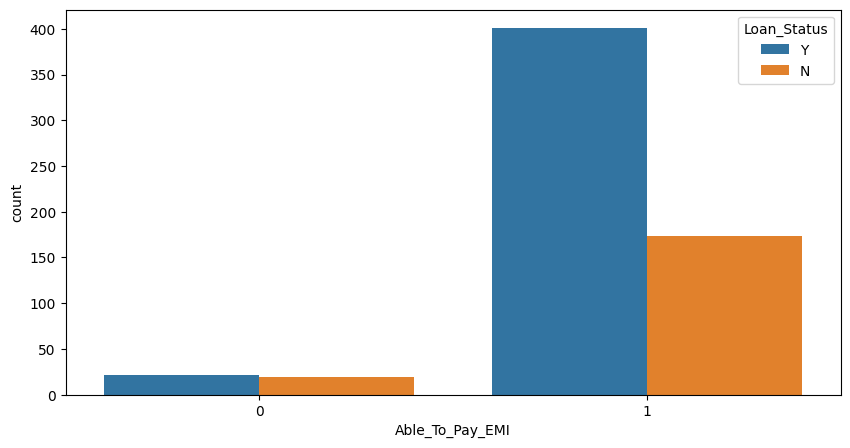

In [66]:
sns.countplot(x = "Able_To_Pay_EMI", data = data, hue = "Loan_Status")

In [67]:
vals = pd.crosstab(data["Able_To_Pay_EMI"], data["Loan_Status"])

In [68]:
vals

Loan_Status,N,Y
Able_To_Pay_EMI,,
0,19,21
1,173,401


In [70]:
chi2_contingency(vals)

(4.467271867611989,
 0.03455011506195388,
 1,
 array([[ 12.50814332,  27.49185668],
        [179.49185668, 394.50814332]]))

# FEATURE ENGINEERING 2

In [71]:
data["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [72]:
data["Dependents"].replace("3+", 3, inplace = True)

In [73]:
data["Dependents"].value_counts()

Dependents
0    345
1    102
2    101
3     51
Name: count, dtype: int64

In [74]:
missing_values = pd.DataFrame({
    "#(Missing Values)": data.isnull().sum(),
    "%(Missing Values)": (data.isnull().sum() / len(data)) * 100
})

missing_values.sort_values(by = "%(Missing Values)", ascending = False)

,#(Missing Values),%(Missing Values)
Credit_History,50,8.143322
EMI,36,5.863192
Loan_Amount_Per_Year,36,5.863192
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Income_Bin,1,0.162866


In [75]:
'''
Filling in missing values - 

Numerical Column - 
    - Mean
    - Median
    - Mode
    - Constant Value
Categorical Column - 
    - Mode
'''

'\nFilling in missing values - \n\nNumerical Column - \n    - Mean\n    - Median\n    - Mode\n    - Constant Value\nCategorical Column - \n    - Mode\n'

In [76]:
data["Credit_History"].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [78]:
data.shape

(614, 17)

In [79]:
data["Credit_History"].isna().sum()

50

In [80]:
values = pd.crosstab(data["Credit_History"], data["Loan_Status"])

In [82]:
chi2_contingency(values)

# This column plays a massive role in Loan Status

(174.63729658142535,
 7.184759548750746e-40,
 1,
 array([[ 28.2464539,  60.7535461],
        [150.7535461, 324.2464539]]))

In [83]:
data["Credit_History"] = data["Credit_History"].fillna(2)

In [84]:
data["Credit_History"].value_counts()

Credit_History
1.0    475
0.0     89
2.0     50
Name: count, dtype: int64

In [85]:
data["Self_Employed"].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [86]:
data["Self_Employed"].isna().sum()

32

In [87]:
values = pd.crosstab(data["Self_Employed"], data["Loan_Status"])

In [88]:
values

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


In [89]:
chi2_contingency(values)

(0.0,
 1.0,
 1,
 array([[157.21649485, 342.78350515],
        [ 25.78350515,  56.21649485]]))

In [90]:
data["Self_Employed"] = data["Self_Employed"].fillna("Other")

In [91]:
data["Self_Employed"].isna().sum()

0

In [92]:
# Simple Imputer

In [93]:
from sklearn.impute import SimpleImputer

In [94]:
a = pd.DataFrame([10, 10, 20, 10, 30, 10, np.nan, 50])

In [95]:
a

,0
0,10.0
1,10.0
2,20.0
3,10.0
4,30.0
5,10.0
6,NaN
7,50.0


In [96]:
a.mean()

0    20.0
dtype: float64

In [97]:
SimpleImputer(strategy = "mean").fit_transform(a)

array([[10.],
       [10.],
       [20.],
       [10.],
       [30.],
       [10.],
       [20.],
       [50.]])

In [98]:
SimpleImputer(strategy = "most_frequent").fit_transform(a)

array([[10.],
       [10.],
       [20.],
       [10.],
       [30.],
       [10.],
       [10.],
       [50.]])

In [100]:
SimpleImputer(strategy = "constant", fill_value = 1000).fit_transform(a)

array([[  10.],
       [  10.],
       [  20.],
       [  10.],
       [  30.],
       [  10.],
       [1000.],
       [  50.]])

In [102]:
# Missing Numerical Data

num_missing = ["EMI", "Loan_Amount_Per_Year", "LoanAmount", "Loan_Amount_Term"]

median_imputer = SimpleImputer(strategy = "median")

for column in num_missing:
    data[column] = pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(data[column])))

In [103]:
# Missing Categorical Data

cat_missing = ["Gender", "Married", "Dependents"]

freq_imputer = SimpleImputer(strategy = "most_frequent")

for column in cat_missing:
    data[column] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(data[column])))

In [105]:
data.isna().sum()

Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
Loan_Status             0
Income_Bin              1
Loan_Amount_Per_Year    0
EMI                     0
Total_Income            0
Able_To_Pay_EMI         0
dtype: int64

In [106]:
data_numerical = data.select_dtypes(include = np.number)

In [107]:
data_numerical.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Amount_Per_Year', 'EMI',
       'Total_Income', 'Able_To_Pay_EMI'],
      dtype='object')

In [108]:
data_numerical.drop(["Credit_History", "Able_To_Pay_EMI"], axis = 1, inplace = True)

In [109]:
data_numerical.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Amount_Per_Year,EMI,Total_Income
0,5849,0.0,128.0,30.0,4.383333,365.277778,5849.0
1,4583,1508.0,128.0,30.0,4.266667,355.555556,6091.0
2,3000,0.0,66.0,30.0,2.200000,183.333333,3000.0
3,2583,2358.0,120.0,30.0,4.000000,333.333333,4941.0
4,6000,0.0,141.0,30.0,4.700000,391.666667,6000.0


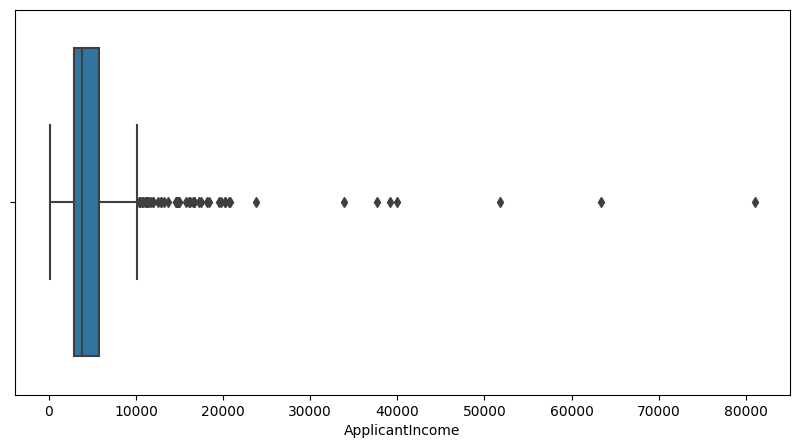

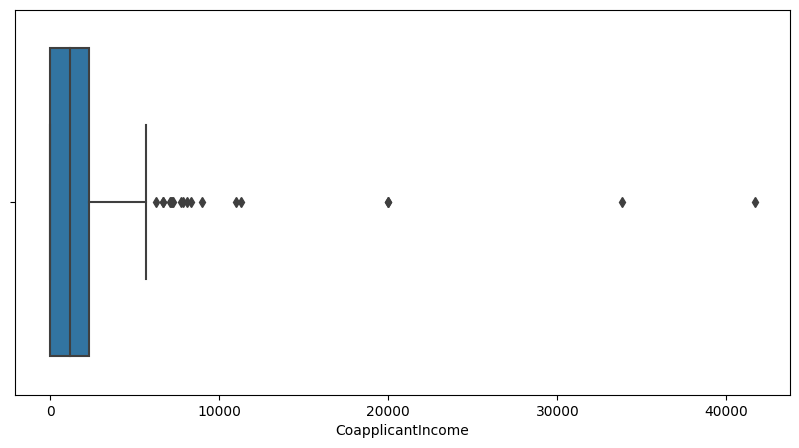

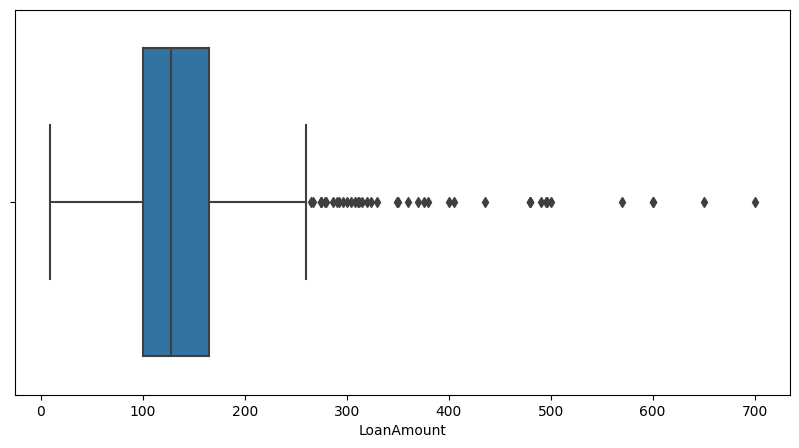

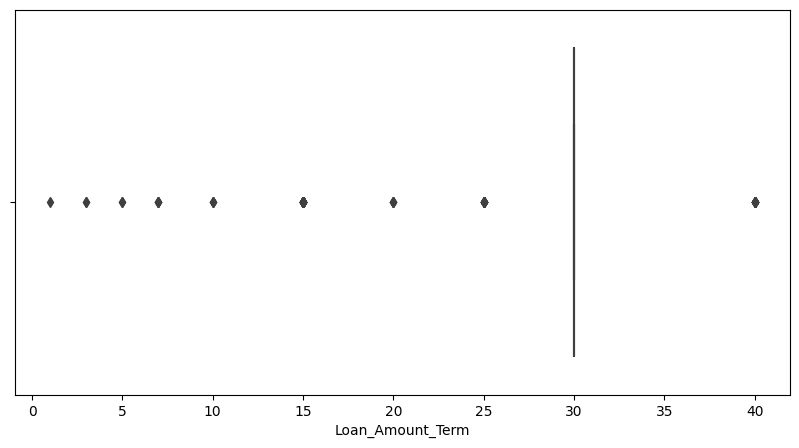

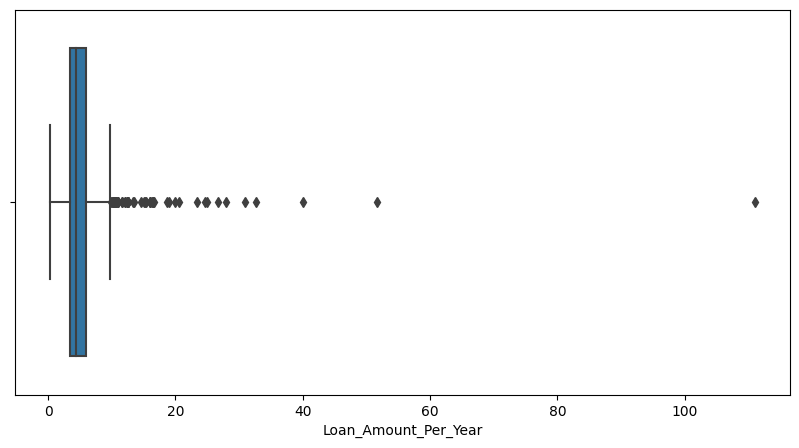

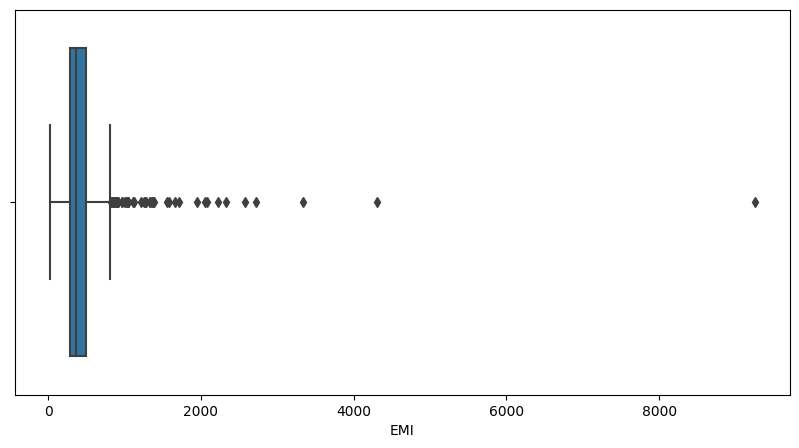

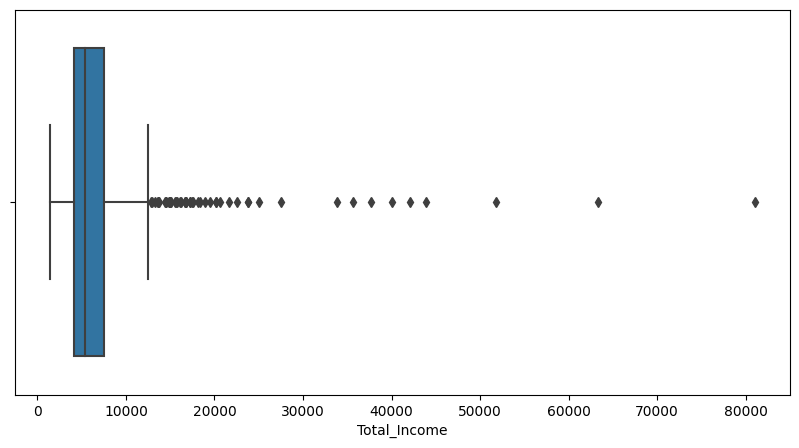

In [110]:
for col in enumerate(data_numerical):
    sns.boxplot(x = col[1], data = data_numerical)
    plt.show()

In [111]:
'''
2 methods to deal with outliers - 

1. IQR (Interquartile Range) Method - 
    - IQR = Q3 (75th percentile) - Q1 (25th percentile)
    - IQR * 1.5 -> Any value outside of this range is called as an outlier.
    
2. Z - Score Method - 
    - Any value that goes beyond a defined z - score threshold for eg. +- 3 is called an outlier.
'''

'\n2 methods to deal with outliers - \n\n1. IQR (Interquartile Range) Method - \n    - IQR = Q3 (75th percentile) - Q1 (25th percentile)\n    - IQR * 1.5 -> Any value outside of this range is called as an outlier.\n    \n2. Z - Score Method - \n    - Any value that goes beyond a defined z - score threshold for eg. +- 3 is called an outlier.\n'

In [113]:
# METHOD 1
q1 = data_numerical.quantile(0.25)
q3 = data_numerical.quantile(0.75)

IQR = q3 - q1

print(IQR)

ApplicantIncome         2917.500000
CoapplicantIncome       2297.250000
LoanAmount                64.500000
Loan_Amount_Term           0.000000
Loan_Amount_Per_Year       2.500000
EMI                      208.333333
Total_Income            3355.750000
dtype: float64


In [114]:
data_numerical.shape

(614, 7)

In [132]:
data_numerical

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Amount_Per_Year,EMI,Total_Income
0,5849,0.0,128.0,30.0,4.383333,365.277778,5849.0
1,4583,1508.0,128.0,30.0,4.266667,355.555556,6091.0
2,3000,0.0,66.0,30.0,2.200000,183.333333,3000.0
3,2583,2358.0,120.0,30.0,4.000000,333.333333,4941.0
4,6000,0.0,141.0,30.0,4.700000,391.666667,6000.0
...,...,...,...,...,...,...,...
609,2900,0.0,71.0,30.0,2.366667,197.222222,2900.0
610,4106,0.0,40.0,15.0,2.666667,222.222222,4106.0
611,8072,240.0,253.0,30.0,8.433333,702.777778,8312.0
612,7583,0.0,187.0,30.0,6.233333,519.444444,7583.0


In [138]:
data_iqr = data_numerical[~(data_numerical < (q3 > 1.5 * IQR))]

In [139]:
data_iqr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Amount_Per_Year,EMI,Total_Income
0,5849,0.0,128.0,30.0,4.383333,365.277778,5849.0
1,4583,1508.0,128.0,30.0,4.266667,355.555556,6091.0
2,3000,0.0,66.0,30.0,2.200000,183.333333,3000.0
3,2583,2358.0,120.0,30.0,4.000000,333.333333,4941.0
4,6000,0.0,141.0,30.0,4.700000,391.666667,6000.0
...,...,...,...,...,...,...,...
609,2900,0.0,71.0,30.0,2.366667,197.222222,2900.0
610,4106,0.0,40.0,15.0,2.666667,222.222222,4106.0
611,8072,240.0,253.0,30.0,8.433333,702.777778,8312.0
612,7583,0.0,187.0,30.0,6.233333,519.444444,7583.0
